## Modelling

In [1]:
import numpy as np
from os import listdir
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf

In [2]:
data_dir = "C:/Users/Aiden/Documents/Data_Science_Stuff/sf_Data_Science_Stuff/Projects/05_Motor_Insurance_Claims_Classifier/dev_aiden/01_Image_Scrape/"

In [3]:
# Load image data from npy file
data_class_0 = np.load(data_dir+'data_class_0.npy', allow_pickle=True)
data_class_1 = np.load(data_dir+'data_class_1.npy', allow_pickle=True)
data_class_2 = np.load(data_dir+'data_class_2.npy', allow_pickle=True)
data_class_3 = np.load(data_dir+'data_class_3.npy', allow_pickle=True)
data_class_4 = np.load(data_dir+'data_class_4.npy', allow_pickle=True)
data_class_5 = np.load(data_dir+'data_class_5.npy', allow_pickle=True)

In [4]:
np.size(data_class_0[386][223][223][2]) # 387 images, size of 224 x 224, 3 channel

1

In [5]:
# Re-shape data
data_class_0_reshaped = tf.image.resize(data_class_0,[224,224])
data_class_1_reshaped = tf.image.resize(data_class_1,[224,224])
data_class_2_reshaped = tf.image.resize(data_class_2,[224,224])
data_class_3_reshaped = tf.image.resize(data_class_3,[224,224])
data_class_4_reshaped = tf.image.resize(data_class_4,[224,224])
data_class_5_reshaped = tf.image.resize(data_class_5,[224,224])

In [6]:
data_class_0_reshaped

<tf.Tensor: shape=(387, 224, 224, 3), dtype=float32, numpy=
array([[[[144.63393   , 151.1046    , 153.70792   ],
         [ 44.72704   ,  32.33291   ,  39.390305  ],
         [189.32901   ,  79.63005   ,  82.374954  ],
         ...,
         [ 16.123608  ,  53.123608  ,  72.12361   ],
         [ 38.164433  ,  73.16444   ,  92.16444   ],
         [ 42.4548    ,  86.0975    , 101.88327   ]],

        [[190.59564   , 204.01657   , 218.38136   ],
         [174.01915   , 192.07272   , 186.82782   ],
         [ 45.403053  ,  34.155632  ,  32.47705   ],
         ...,
         [ 38.75127   ,  75.751274  ,  94.751274  ],
         [ 36.219578  ,  73.21958   ,  91.21958   ],
         [ 17.267857  ,  59.48209   ,  75.482086  ]],

        [[ 22.871164  ,  55.468098  ,  73.771675  ],
         [125.454056  , 153.51274   , 175.26146   ],
         [202.51787   , 206.40053   , 211.93625   ],
         ...,
         [ 40.37122   ,  77.371216  ,  96.371216  ],
         [ 19.389112  ,  58.0702    ,  75.2296

In [7]:
# free-up memory
del data_class_0, data_class_1, data_class_2, data_class_3, data_class_4, data_class_5

In [8]:
# Create Data Dictionary

data_dict = {
    "data": [data_class_0_reshaped, 
             data_class_1_reshaped, 
             data_class_2_reshaped, 
             data_class_3_reshaped, 
             data_class_4_reshaped, 
             data_class_5_reshaped],
    "label": [np.full((1,data_class_0_reshaped.shape[0]), 0), 
              np.full((1,data_class_1_reshaped.shape[0]), 1), 
              np.full((1,data_class_2_reshaped.shape[0]), 2), 
              np.full((1,data_class_3_reshaped.shape[0]), 3), 
              np.full((1,data_class_4_reshaped.shape[0]), 4), 
              np.full((1,data_class_5_reshaped.shape[0]), 5)]
}

In [9]:
# Combine data

data_combined = tf.concat([data_class_0_reshaped, data_class_1_reshaped], axis=0)
data_combined = tf.concat([data_combined, data_class_2_reshaped], axis=0)
data_combined = tf.concat([data_combined, data_class_3_reshaped], axis=0)
data_combined = tf.concat([data_combined, data_class_4_reshaped], axis=0)
data_combined = tf.concat([data_combined, data_class_5_reshaped], axis=0)
data_combined.shape

TensorShape([1569, 224, 224, 3])

In [10]:
data_combined[0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[144.63393 , 151.1046  , 153.70792 ],
        [ 44.72704 ,  32.33291 ,  39.390305],
        [189.32901 ,  79.63005 ,  82.374954],
        ...,
        [ 16.123608,  53.123608,  72.12361 ],
        [ 38.164433,  73.16444 ,  92.16444 ],
        [ 42.4548  ,  86.0975  , 101.88327 ]],

       [[190.59564 , 204.01657 , 218.38136 ],
        [174.01915 , 192.07272 , 186.82782 ],
        [ 45.403053,  34.155632,  32.47705 ],
        ...,
        [ 38.75127 ,  75.751274,  94.751274],
        [ 36.219578,  73.21958 ,  91.21958 ],
        [ 17.267857,  59.48209 ,  75.482086]],

       [[ 22.871164,  55.468098,  73.771675],
        [125.454056, 153.51274 , 175.26146 ],
        [202.51787 , 206.40053 , 211.93625 ],
        ...,
        [ 40.37122 ,  77.371216,  96.371216],
        [ 19.389112,  58.0702  ,  75.22966 ],
        [ 17.886398,  59.2437  ,  75.45793 ]],

       ...,

       [[ 43.563877,  92.51444 , 119.36663 ],
        [ 15.

In [11]:
# Combine labels

data_labels_combined = np.concatenate((data_dict['label'][0], data_dict['label'][1]), axis = 1)
data_labels_combined = np.concatenate((data_labels_combined, data_dict['label'][2]), axis = 1)
data_labels_combined = np.concatenate((data_labels_combined, data_dict['label'][3]), axis = 1)
data_labels_combined = np.concatenate((data_labels_combined, data_dict['label'][4]), axis = 1)
data_labels_combined = np.concatenate((data_labels_combined, data_dict['label'][5]), axis = 1)
np.size(data_labels_combined)

1569

In [12]:
# Free memory

del data_class_0_reshaped, data_class_1_reshaped, data_class_2_reshaped, data_class_3_reshaped, data_class_4_reshaped, data_class_5_reshaped

In [ ]:
# Split into training and testing


In [ ]:
data_combined

In [13]:
data_combined_normalised = data_combined / 255

# Modelling

In [14]:
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception

In [28]:
##### Transfer learning

In [ ]:
n_classes = 6

In [52]:
base_model = tf.keras.applications.xception.Xception(weights = "imagenet",
                                                    include_top= False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)

In [53]:
model = tf.keras.Model(inputs=base_model.input, outputs= output)

In [54]:
for layer in base_model.layers:
    layer.trainable = False

In [55]:
optimiser = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay= 0.01)
model.compile(loss="SparseCategoricalCrossentropy", optimizer = optimiser, metrics =["accuracy"])

In [57]:
history = model.fit(data_combined_normalised,
                    data_labels_combined.reshape(1569,1),
                    epochs = 5)

Epoch 1/5
50/50 [==============================] - 139s 3s/step - loss: 2.7009 - accuracy: 0.6571
Epoch 2/5
50/50 [==============================] - 160s 3s/step - loss: 1.6130 - accuracy: 0.7827
Epoch 3/5
50/50 [==============================] - 154s 3s/step - loss: 0.7093 - accuracy: 0.8458
Epoch 4/5
50/50 [==============================] - 151s 3s/step - loss: 0.4802 - accuracy: 0.8821
Epoch 5/5
50/50 [==============================] - 141s 3s/step - loss: 0.2544 - accuracy: 0.9222


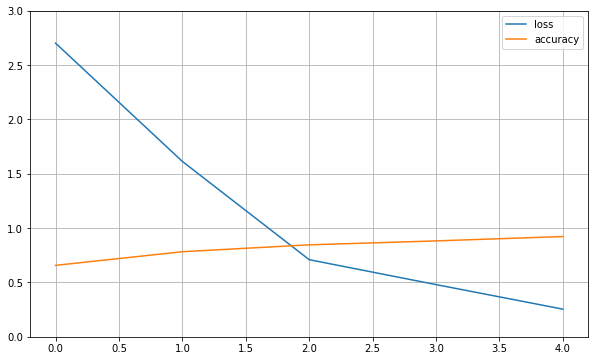

In [63]:
# Plot training history

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.show()

In [ ]:
# Predict new instance

# import libraries
import numpy as np

# Libraries to save names of images in Data folder
from os import listdir
from os.path import isfile, join

# keras load image, resize and save as array
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
#import image 
from tensorflow.keras.preprocessing.image import img_to_array

def import_image(directory, image):
    # load the image
    img = load_img(f'{directory}{image}')
      
    # convert to numpy array
    data = img_to_array(img)
    
    # convert image to size 224 x 224 (for ResNet)
    img_resized = tf.image.resize(data,[224,224])
    return img_resized

In [73]:
directory_test_image = "C:/Users/Aiden/Documents/Data_Science_Stuff/sf_Data_Science_Stuff/Projects/05_Motor_Insurance_Claims_Classifier/dev_aiden/01_Image_Scrape/Predict_new_instance/"
image = "test_image_02_rotated.jpg"

test_image = import_image(directory_test_image, image)

In [74]:
test_image = test_image / 255

In [75]:
test_image = tf.expand_dims(test_image, axis=0)

In [76]:
# Predict new image
test_proba = model.predict(test_image)
test_proba.round(2)

array([[0., 1., 0., 0., 0., 0.]], dtype=float32)